# Q1 and Q2

# Train Polar and Cartesian Model and Test both models on their capability of extrapolation

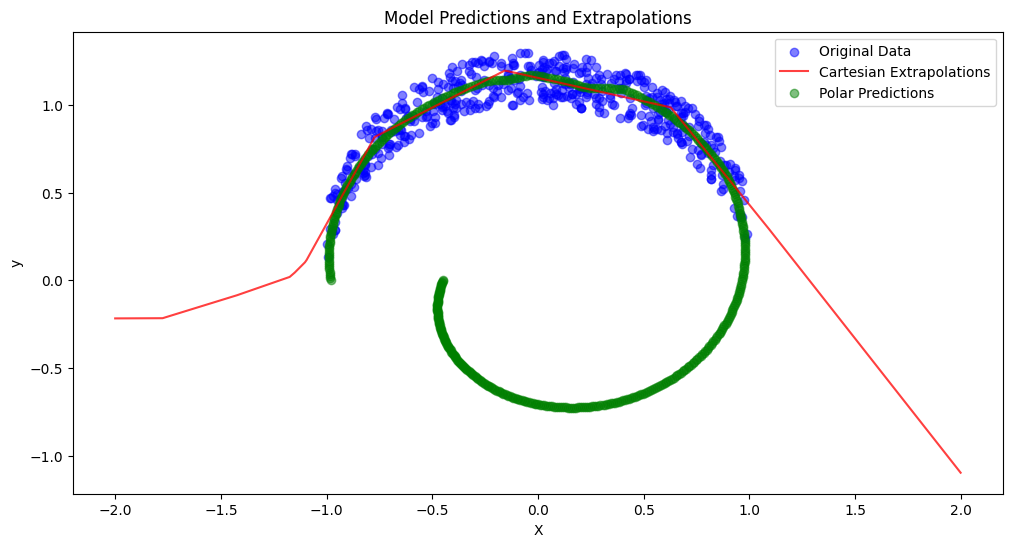

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(10)
torch.manual_seed(10)

# Generate Cartesian coordinates dataset
x_cartesian = np.random.rand(500, 1) * 2 - 1  # Values from -1 to 1
y_cartesian = np.sqrt(1 - x_cartesian**2) + np.random.rand(500, 1) * 0.3  # Circle equation with noise

# Convert to polar coordinates for the second dataset
r = np.sqrt(x_cartesian**2 + y_cartesian**2)
theta = np.arctan2(y_cartesian, x_cartesian)
X_polar = (theta - np.mean(theta)) / np.std(theta)
y_polar = (r - np.mean(r)) / np.std(r)

# Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize two models
model_cartesian = LinearRegression()
model_polar = LinearRegression()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer_cartesian = optim.Adam(model_cartesian.parameters(), lr=0.01)
optimizer_polar = optim.Adam(model_polar.parameters(), lr=0.01)

# Convert data to tensors
X_cartesian_tensor = torch.tensor(x_cartesian, dtype=torch.float32)
y_cartesian_tensor = torch.tensor(y_cartesian, dtype=torch.float32)
X_polar_tensor = torch.tensor(X_polar, dtype=torch.float32)
y_polar_tensor = torch.tensor(y_polar, dtype=torch.float32)

# Training loop for Cartesian model
for iteration in range(2000):
    optimizer_cartesian.zero_grad()
    y_pred_cartesian = model_cartesian(X_cartesian_tensor)
    loss_cartesian = criterion(y_cartesian_tensor, y_pred_cartesian)
    loss_cartesian.backward()
    optimizer_cartesian.step()

# Training loop for Polar model
for iteration in range(2000):
    optimizer_polar.zero_grad()
    y_pred_polar = model_polar(X_polar_tensor)
    loss_polar = criterion(y_polar_tensor, y_pred_polar)
    loss_polar.backward()
    optimizer_polar.step()

# Extrapolate with Cartesian model
X_inf_cartesian_ext = np.linspace(-2, 2, 500).reshape(-1, 1)
X_inf_cartesian_ext_tensor = torch.tensor(X_inf_cartesian_ext, dtype=torch.float32)
y_pred_cartesian_ext = model_cartesian(X_inf_cartesian_ext_tensor).detach().numpy()

# Predict with Polar model and convert back to Cartesian for plotting
theta_inf = np.linspace(-np.pi, np.pi, 500).reshape(-1, 1)
theta_inf_normalized = (theta_inf - np.mean(theta)) / np.std(theta)
theta_inf_tensor = torch.tensor(theta_inf_normalized, dtype=torch.float32)
r_pred = model_polar(theta_inf_tensor).detach().numpy() * np.std(r) + np.mean(r)
x_pred_polar = r_pred * np.cos(theta_inf)
y_pred_polar = r_pred * np.sin(theta_inf)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(x_cartesian, y_cartesian, label='Original Data', alpha=0.5, color='blue')
plt.plot(X_inf_cartesian_ext, y_pred_cartesian_ext, color='red', label='Cartesian Extrapolations', alpha=0.75)
plt.scatter(x_pred_polar, y_pred_polar, color='green', label='Polar Predictions', alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Predictions and Extrapolations')
plt.legend()
plt.show()


# Q3

# Train Polar and Cartesian Model with and without normalization

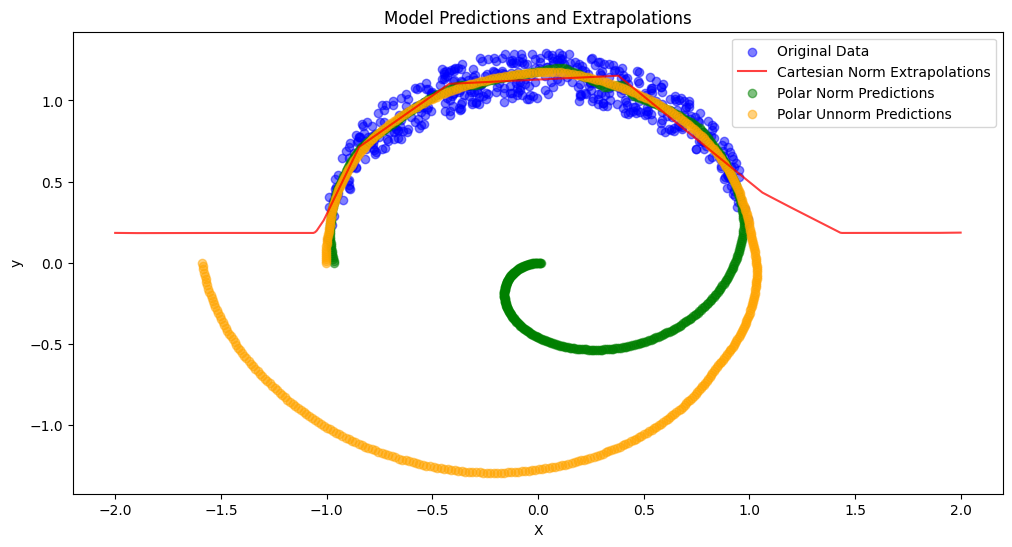

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


# Set random seed for reproducibility
np.random.seed(11)
torch.manual_seed(11)

# Generate Cartesian coordinates dataset
x_cartesian = np.random.rand(500, 1) * 2 - 1  # Values from -1 to 1
y_cartesian = np.sqrt(1 - x_cartesian**2) + np.random.rand(500, 1) * 0.3  # Circle equation with noise

# Convert to polar coordinates for the second dataset
r = np.sqrt(x_cartesian**2 + y_cartesian**2)
theta = np.arctan2(y_cartesian, x_cartesian)
X_polar = (theta - np.mean(theta)) / np.std(theta)
y_polar = (r - np.mean(r)) / np.std(r)

# Unnormalized polar coordinates
X_polar_unnorm = theta
y_polar_unnorm = r

# Define the model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize models for both normalized and unnormalized data
model_cartesian_norm = LinearRegression()
model_polar_norm = LinearRegression()
model_cartesian_unnorm = LinearRegression()
model_polar_unnorm = LinearRegression()

# Convert data to tensors
X_cartesian_tensor = torch.tensor(x_cartesian, dtype=torch.float32)
y_cartesian_tensor = torch.tensor(y_cartesian, dtype=torch.float32)
X_polar_tensor_norm = torch.tensor(X_polar, dtype=torch.float32)
y_polar_tensor_norm = torch.tensor(y_polar, dtype=torch.float32)
X_polar_tensor_unnorm = torch.tensor(X_polar_unnorm, dtype=torch.float32)
y_polar_tensor_unnorm = torch.tensor(y_polar_unnorm, dtype=torch.float32)

# Prepare the rest of the code for training and visualization


# Loss function and optimizer setup
criterion = nn.MSELoss()
optimizer_cartesian_norm = optim.Adam(model_cartesian_norm.parameters(), lr=0.01)
optimizer_polar_norm = optim.Adam(model_polar_norm.parameters(), lr=0.01)
optimizer_cartesian_unnorm = optim.Adam(model_cartesian_unnorm.parameters(), lr=0.01)
optimizer_polar_unnorm = optim.Adam(model_polar_unnorm.parameters(), lr=0.01)

# Training loop for each model
n_iterations = 2000

# Training loop for normalized Cartesian model
for iteration in range(n_iterations):
    optimizer_cartesian_norm.zero_grad()
    y_pred = model_cartesian_norm(X_cartesian_tensor)
    loss = criterion(y_cartesian_tensor, y_pred)
    loss.backward()
    optimizer_cartesian_norm.step()

# Training loop for normalized Polar model
for iteration in range(n_iterations):
    optimizer_polar_norm.zero_grad()
    y_pred = model_polar_norm(X_polar_tensor_norm)
    loss = criterion(y_polar_tensor_norm, y_pred)
    loss.backward()
    optimizer_polar_norm.step()

# Training loop for unnormalized Cartesian model
# Reusing Cartesian data since it's the same for normalized and unnormalized
for iteration in range(n_iterations):
    optimizer_cartesian_unnorm.zero_grad()
    y_pred = model_cartesian_unnorm(X_cartesian_tensor)
    loss = criterion(y_cartesian_tensor, y_pred)
    loss.backward()
    optimizer_cartesian_unnorm.step()

# Training loop for unnormalized Polar model
for iteration in range(n_iterations):
    optimizer_polar_unnorm.zero_grad()
    y_pred = model_polar_unnorm(X_polar_tensor_unnorm)
    loss = criterion(y_polar_tensor_unnorm, y_pred)
    loss.backward()
    optimizer_polar_unnorm.step()

# Predictions for visualization
# Extrapolate with both Cartesian models
X_ext = np.linspace(-2, 2, 500).reshape(-1, 1)
X_ext_tensor = torch.tensor(X_ext, dtype=torch.float32)
y_pred_cartesian_norm_ext = model_cartesian_norm(X_ext_tensor).detach().numpy()
y_pred_cartesian_unnorm_ext = model_cartesian_unnorm(X_ext_tensor).detach().numpy()

# Predict with both Polar models and convert back to Cartesian for plotting
theta_ext = np.linspace(-np.pi, np.pi, 500).reshape(-1, 1)
theta_ext_tensor_norm = torch.tensor((theta_ext - np.mean(theta)) / np.std(theta), dtype=torch.float32)
theta_ext_tensor_unnorm = torch.tensor(theta_ext, dtype=torch.float32)

r_pred_norm = model_polar_norm(theta_ext_tensor_norm).detach().numpy() * np.std(r) + np.mean(r)
x_pred_polar_norm = r_pred_norm * np.cos(theta_ext)
y_pred_polar_norm = r_pred_norm * np.sin(theta_ext)

r_pred_unnorm = model_polar_unnorm(theta_ext_tensor_unnorm).detach().numpy()
x_pred_polar_unnorm = r_pred_unnorm * np.cos(theta_ext)
y_pred_polar_unnorm = r_pred_unnorm * np.sin(theta_ext)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(x_cartesian, y_cartesian, label='Original Data', alpha=0.5, color='blue')
plt.plot(X_ext, y_pred_cartesian_norm_ext, label='Cartesian Norm Extrapolations', alpha=0.75, color='red')
# plt.plot(X_ext, y_pred_cartesian_unnorm_ext, label='Cartesian Unnorm Extrapolations', alpha=0.75, color='purple')
plt.scatter(x_pred_polar_norm, y_pred_polar_norm, label='Polar Norm Predictions', alpha=0.5, color='green')
plt.scatter(x_pred_polar_unnorm, y_pred_polar_unnorm, label='Polar Unnorm Predictions', alpha=0.5, color='orange')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Predictions and Extrapolations')
plt.legend()
plt.show()
